Importing all necessary modules

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt 
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_squared_error as mse 

In [ ]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LogisticRegression as lor


In [ ]:
#read in data
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
train_data = pd.read_csv("train.csv")

#### The most basic model 
- The most simple model would predict the same for all observations : average or median of the training dataset


In [ ]:
train_copy = train_data.copy(deep = 1)

In [ ]:
train_copy.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               6495 non-null   int64  
 1   property_name             6471 non-null   object 
 2   property_summary          6283 non-null   object 
 3   property_space            4186 non-null   object 
 4   property_desc             6492 non-null   object 
 5   property_neighborhood     3684 non-null   object 
 6   property_notes            1973 non-null   object 
 7   property_transit          3915 non-null   object 
 8   property_access           3360 non-null   object 
 9   property_interaction      3091 non-null   object 
 10  property_rules            3326 non-null   object 
 11  property_zipcode          6361 non-null   object 
 12  property_lat              6495 non-null   float64
 13  property_lon              6495 non-null   float64
 14  property

In [ ]:
train_data.head()

,property_id,property_name,property_summary,property_space,property_desc,property_neighborhood,property_notes,property_transit,property_access,property_interaction,...,reviews_rating,reviews_acc,reviews_cleanliness,reviews_checkin,reviews_communication,reviews_location,reviews_value,reviews_per_month,extra,target
0,1,"Chambre à louer,courte durée.","Je loue une chambre dans mon appartement ""atyp...","Espace duplex très grand et lumineux,la chambr...","Je loue une chambre dans mon appartement ""atyp...",NaN,NaN,Accès direct de la Gare du Nord ( 4 arrêts de...,NaN,Je suis entièrement disponible pour tout échan...,...,97.0,10.0,9.0,10.0,10.0,9.0,10.0,1.31,Host Has Profile Pic,26
1,2,Urban Antwerp - Spacious & Authentic Herenhouse,Our place is a typical historic herenhuis clos...,The spaces in our house are all large with hig...,Our place is a typical historic herenhuis clos...,Bar and restaurants One of our favourite bars ...,NaN,In Antwerp we have the system with rental bike...,You will be able to access the following space...,We are always available to help and assist whe...,...,100.0,10.0,10.0,10.0,10.0,8.0,10.0,1.00,"Host Has Profile Pic, Is Location Exact",75
2,3,comfortable apartment in friendly neighborhood,Nice and cozy apartment for couples who like t...,Nice proper and clean apartment. No personal s...,Nice and cozy apartment for couples who like t...,Op 5 minuten lopen zijn er 2 gezellig stadpark...,Public transport is next to the apartment and ...,Fiets verhuur voor de deur. (dag/weekkaart) vi...,As a good host I trust my guest. No secrets an...,"Ik ben altijd bereikbaar voor vragen, maar ben...",...,93.0,10.0,10.0,9.0,9.0,9.0,10.0,0.75,"Host Has Profile Pic, Is Location Exact, Insta...",110
3,4,Historical City Antwerp.,The best place to stay if you like to be in th...,Our rooms are nice and spacious. You stay in a...,The best place to stay if you like to be in th...,In the middle of the historical city of Antwerp,Staying in our house you have to be able to cl...,Tram 10 and 11 from Central station stop in ou...,Beside your own room you can relax in the down...,We will be available to let you know where wha...,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6.90,"Host Is Superhost, Host Has Profile Pic, Host ...",60
4,5,Antwerp center city,Our place is right in the heart of the histori...,It is situated in the center if the old town. ...,Our place is right in the heart of the histori...,The neighborhood is in the historical part of ...,NaN,The easiest is just to walk into the city ther...,You will enter the house through the Downstair...,I will be present to help you out with any kin...,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,4.16,"Host Is Superhost, Host Has Profile Pic, Host ...",55


In [ ]:
train_copy['basic_target'] = train_data['target'].median()

In [ ]:
train_data['target'].median()

55.0

#### Accuracy of the basic model

In [ ]:
print('Root mean Squared Error of the basic model on the validation set is:',mse(train_copy['target'], train_copy['basic_target'],squared=0))

Root mean Squared Error of the basic model on the validation set is: 53.48542641792253


#### Data Processing

In [ ]:
train_data.columns

Index(['property_id', 'property_name', 'property_summary', 'property_space',
       'property_desc', 'property_neighborhood', 'property_notes',
       'property_transit', 'property_access', 'property_interaction',
       'property_rules', 'property_zipcode', 'property_lat', 'property_lon',
       'property_type', 'property_room_type', 'property_max_guests',
       'property_bathrooms', 'property_bedrooms', 'property_beds',
       'property_bed_type', 'property_amenities', 'property_sqfeet',
       'property_scraped_at', 'property_last_updated', 'host_id', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_nr_listings', 'host_nr_listings_total',
       'host_verified', 'booking_price_covers', 'booking_min_nights',
       'booking_max_nights', 'booking_availability_30',
       'booking_availability_60', 'booking_availability_90',
       'booking_availability_365', 'booking_cancel_policy', 'reviews_num',
       'reviews_first', 're

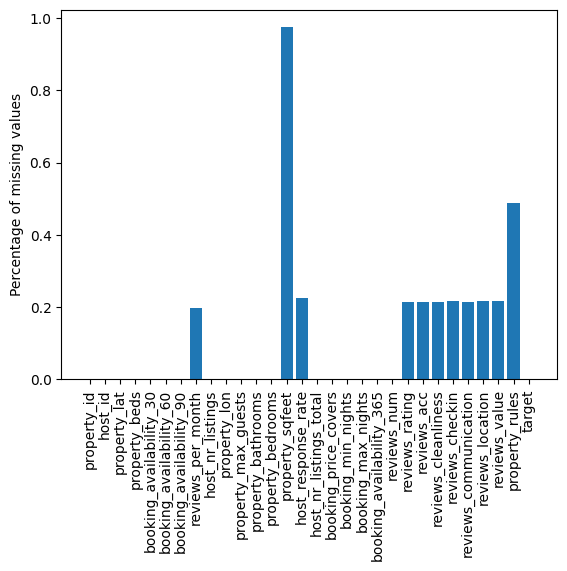

In [ ]:
# select only numerical columns
na_counts = train_data[['property_id','host_id', 'property_lat', 'property_beds',\
       'booking_availability_30', 'booking_availability_60',\
       'booking_availability_90','reviews_per_month','host_nr_listings',\
       'property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'property_sqfeet', 'host_response_rate', 'property_beds',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_max_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value',\
       'property_rules','target']].isna().mean()
na_counts
plt.bar(na_counts.index, na_counts)
plt.xticks(rotation=90)
plt.ylabel('Percentage of missing values')

plt.show()


Only predictive features should be kept for the final modelling. Several columns are removed, such as property_id and host\_id, which are unlikely to provide relevant information.
Not all features are filled in every field. It can be seen that property sqfeet has 97.5% missing values and it would be preferable to eliminate them.

In [ ]:
train_data = train_data[['property_lat',\
       'booking_availability_30', 'booking_availability_60',\
       'booking_availability_90','reviews_per_month','host_nr_listings',\
       'property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'host_response_rate',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_max_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value',\
       'target']]

Only predictive features should be kept for the final modelling. Several columns are removed, such as \textit{'property\_id'} and \textit{'host\_id'}, which are unlikely to provide relevant information.\par
Not all features are filled in every field. It can be seen that property sqfeet has 97.5\% missing values and it would be preferable to eliminate them.\par

<ipython-input-30-7f2fb89e09f9>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


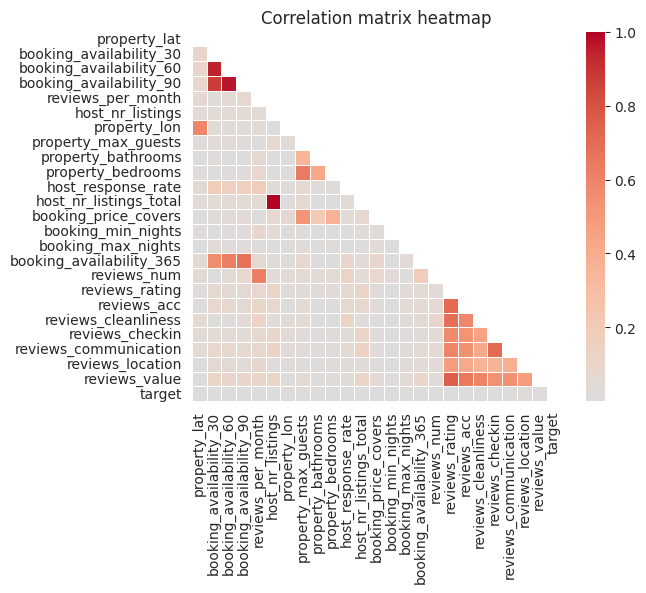

In [ ]:
# Calculate correlation matrix
corr_matrix = train_data.corr().abs()
# Generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Create heatmap
sns.set_style('white')
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
square=True, linewidths=.5, annot=False, xticklabels = True, yticklabels = True)
plt.title('Correlation matrix heatmap')
plt.show()

In [ ]:
train_data.columns

Index(['property_lat', 'booking_availability_30', 'booking_availability_60',
       'booking_availability_90', 'reviews_per_month', 'host_nr_listings',
       'property_lon', 'property_max_guests', 'property_bathrooms',
       'property_bedrooms', 'host_response_rate', 'host_nr_listings_total',
       'booking_price_covers', 'booking_min_nights', 'booking_max_nights',
       'booking_availability_365', 'reviews_num', 'reviews_rating',
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',
       'reviews_communication', 'reviews_location', 'reviews_value', 'target'],
      dtype='object')

In [ ]:
df = train_data[['property_lon', 'property_max_guests',\
       'property_bathrooms', 'property_bedrooms',\
       'host_response_rate',\
       'host_nr_listings_total', 'booking_price_covers', 'booking_min_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_acc', 'reviews_cleanliness', 'reviews_checkin',\
       'reviews_communication', 'reviews_location', 'reviews_value'\
       ,'target']]

Split the data before preprocessing:

In [ ]:
X = train_data
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

The preprocessing function:

In [ ]:
def prep_num(df):
  df = df.copy(deep=1)
  df = df.loc[:,['property_lon', 'property_max_guests',\
       'property_bathrooms', \
       'host_response_rate',\
       'host_nr_listings_total','booking_min_nights',\
       'booking_availability_365', 'reviews_num', 'reviews_rating',\
       'reviews_location']]
  
  for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)
  
  return df

In [ ]:
X_train = prep_num(X_train)
X_test = prep_num(X_test)

#### Linear/Polynomial Regression Models:
    - LinearRegression from scikitlearn

Now we will take care of all the missing values in the numeric columns
   

*   It looks like property_sqfeet has 6333 missing values, hence instead of imputing we just remove that columns



 

##### So now we have the cleaned data with median of the training column imputed to all missing values.
##### We pass this to the linear regression model

In [ ]:
### Might be susceptible to data leakage as we are making the split after imputation
# We have to create this split first, then perform the pre-processing

In [ ]:
model = lr()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([68.9854844 , 68.78475973, 68.13776168, ..., 67.51020724,
       67.31268075, 69.17277947])

In [ ]:
print('Root mean squared error of LR model for numeric columns on the validation set is: ', mse(model.predict(X_test),y_test, squared = 0))

Root mean squared error of LR model for numeric columns on the validation set is:  45.93806060143809


In [ ]:
#read in data
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
final_test_data = pd.read_csv('test.csv')

In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_id               919 non-null    int64  
 1   property_name             916 non-null    object 
 2   property_summary          906 non-null    object 
 3   property_space            567 non-null    object 
 4   property_desc             918 non-null    object 
 5   property_neighborhood     455 non-null    object 
 6   property_notes            321 non-null    object 
 7   property_transit          492 non-null    object 
 8   property_access           446 non-null    object 
 9   property_interaction      399 non-null    object 
 10  property_rules            439 non-null    object 
 11  property_zipcode          905 non-null    float64
 12  property_lat              919 non-null    float64
 13  property_lon              919 non-null    float64
 14  property_t

In [ ]:
nf_test_data = final_test_data.copy(deep=1)
nf_test_data = prep_num(nf_test_data)

In [ ]:
nf_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   property_lon              919 non-null    float64
 1   property_max_guests       919 non-null    int64  
 2   property_bathrooms        919 non-null    float64
 3   host_response_rate        919 non-null    float64
 4   host_nr_listings_total    919 non-null    int64  
 5   booking_min_nights        919 non-null    int64  
 6   booking_availability_365  919 non-null    int64  
 7   reviews_num               919 non-null    int64  
 8   reviews_rating            919 non-null    float64
 9   reviews_location          919 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 71.9 KB


In [ ]:
test_preds = model.predict(nf_test_data)

In [ ]:
test_preds

array([ 78.54,  71.39,  76.83,  63.33, 103.8 , 103.65, 125.6 ,  83.22,
        86.18,  57.07,  59.22,  50.53,  69.14,  80.74,  69.22,  35.03,
        66.17,  65.44,  64.34,  58.03, 108.33,  65.87,  67.72,  71.2 ,
        79.45,  55.88,  74.32,  81.89,  60.08,  78.4 ,  60.17,  57.09,
        52.92,  78.55,  68.67,  75.12,  68.63,  63.11,  77.27,  59.2 ,
        80.6 ,  58.63,  68.08,  83.15,  89.79,  64.12,  46.74,  68.32,
        61.43,  84.98,  59.68,  75.82,  55.23,  74.97,  52.59,  40.92,
        65.25,  76.07,  57.55,  66.46,  63.3 ,  43.11,  48.06,  62.07,
        75.54,  59.84,  84.36,  96.29,  71.16,  66.69,  54.89,  71.11,
        80.05,  67.45,  66.05,  67.49,  54.7 ,  61.52,  68.31,  69.16,
        84.61,  64.48,  64.83,  63.62,  60.06,  67.59,  81.28,  76.36,
        74.28,  69.56,  86.28,  67.7 ,  61.57,  89.84,  56.7 ,  73.8 ,
        69.11,  78.18,  71.19,  67.39,  55.23,  59.24,  54.82,  62.08,
        79.21, 105.05,  72.17,  85.11,  61.17,  71.69,  78.23,  76.97,
      

In [ ]:
final_test_data['property_id']

0      6501
1      6502
2      6503
3      6504
4      6505
       ... 
914    7415
915    7416
916    7417
917    7418
918    7419
Name: property_id, Length: 919, dtype: int64

In [ ]:
pd.concat([final_test_data['property_id'],pd.DataFrame(test_preds)], axis=1).to_csv("Trial1.csv", header=0, index =0)